In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [2]:
restaurant = pd.read_csv("raw_restaurant_categorized_cleaned.csv")
restaurant["location"] = restaurant["location"].str.replace("quận ", "").str.lower().str.strip()
# restaurant.head()

# restaurant_only = restaurant[restaurant["category"] == "nhà hàng"]
restaurant_only = restaurant
restaurant_only = restaurant_only.groupby(["location"])["name"].count()
restaurant_only = pd.DataFrame({'location':restaurant_only.index, '# restaurants':restaurant_only.values})
restaurant_only

,location,# restaurants
0,ba đình,499
1,bắc từ liêm,44
2,cầu giấy,569
3,hai bà trưng,532
4,hoàn kiếm,572
5,hoàng mai,106
6,hà đông,196
7,long biên,127
8,nam từ liêm,146
9,thanh xuân,275


In [8]:
population = pd.read_csv("population.csv")
population["Diện tích"] = population["Diện tích"].astype(float)
population["Tổng chung"] = population["Tổng chung"] / population["Diện tích"]
population.head()

,Quận,Tổng chung,Diện tích
0,Ba Đình,23988.432432,9.25
1,Hoàn Kiếm,25636.672968,5.29
2,Tây Hồ,6684.506456,24.01
3,Long Biên,5382.095778,59.93
4,Cầu Giấy,24317.206983,12.03


In [14]:
# population.keys()
population_by_district = population[["Quận", "Tổng chung"]].copy()
population_by_district.reset_index(drop=True, inplace=True)
population_by_district["Quận"] = population_by_district["Quận"] .str.lower().str.strip()
population_by_district.rename(columns={"Quận": "location", "Tổng chung": "population density"}, inplace=True)
population_by_district

,location,population density
0,ba đình,23988.432432
1,hoàn kiếm,25636.672968
2,tây hồ,6684.506456
3,long biên,5382.095778
4,cầu giấy,24317.206983
5,đống đa,37309.839357
6,hai bà trưng,30087.809713
7,hoàng mai,12558.209325
8,thanh xuân,32326.431718
9,sóc sơn,1120.459365


In [15]:
joined = population_by_district.merge(
    restaurant_only, how="inner",
    on=["location"]
)
joined.set_index("location", inplace=True)
joined

,population density,# restaurants
location,,
ba đình,23988.432432,499
hoàn kiếm,25636.672968,572
tây hồ,6684.506456,131
long biên,5382.095778,127
cầu giấy,24317.206983,569
đống đa,37309.839357,775
hai bà trưng,30087.809713,532
hoàng mai,12558.209325,106
thanh xuân,32326.431718,275


KeyError: 'population'

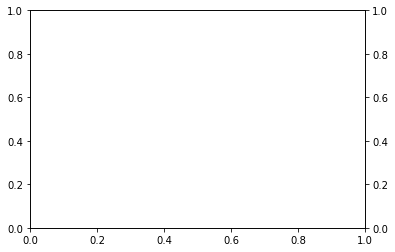

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
joined["population density"].plot(kind='bar', color=[0.19215686, 0.50980392, 0.74117647, 1.], ax=ax, width=width, position=1)
joined["# restaurants"].plot(kind='bar', color=[0.99215686, 0.81568627, 0.63529412, 1.], ax=ax2, width=width, position=0)

ax.set_ylabel('population density')
ax2.set_ylabel('# restaurants')
ax.legend(loc=2)
ax2.legend(loc=1)

plt.savefig("./plot1.png")
plt.show()

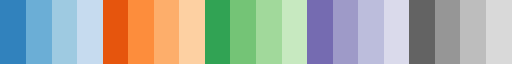

In [95]:
cmap = plt.colormaps["tab20c"]
cmap

In [99]:
outer_colors = cmap([1, 7])
outer_colors

array([[0.41960784, 0.68235294, 0.83921569, 1.        ],
       [0.99215686, 0.81568627, 0.63529412, 1.        ]])